<a href="https://colab.research.google.com/github/diogoasilveira/An-lise-de-reviews-de-jogos-na-Steam/blob/main/Steam_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando o Dataset

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1DNJWdyCFB9TC4tH4dTjkFYjpJCYhplNP' -O kaggle.json

--2024-09-24 02:32:23--  https://drive.google.com/uc?export=download&id=1DNJWdyCFB9TC4tH4dTjkFYjpJCYhplNP
Resolving drive.google.com (drive.google.com)... 209.85.145.102, 209.85.145.101, 209.85.145.138, ...
Connecting to drive.google.com (drive.google.com)|209.85.145.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1DNJWdyCFB9TC4tH4dTjkFYjpJCYhplNP&export=download [following]
--2024-09-24 02:32:23--  https://drive.usercontent.google.com/download?id=1DNJWdyCFB9TC4tH4dTjkFYjpJCYhplNP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [application/octet-stream]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      71  --.-KB/s    in 0s      

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!cat ~/.kaggle/kaggle.json

{"username":"pedrosantosneto","key":"05ac1d497eed84454fb3f5249c8b3da8"}

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download antonkozyriev/game-recommendations-on-steam

Dataset URL: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam
License(s): CC0-1.0
 98% 649M/660M [00:02<00:00, 270MB/s]
100% 660M/660M [00:02<00:00, 269MB/s]


In [ ]:
!unzip game-recommendations-on-steam.zip

Archive:  game-recommendations-on-steam.zip
  inflating: games.csv               
  inflating: games_metadata.json     
  inflating: recommendations.csv     
  inflating: users.csv               


### EDA

Imports:

In [ ]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Leitura e manipulação
import pandas as pd
import numpy as np

#### Recomendações

In [ ]:
recom = pd.read_csv('recommendations.csv')
recom = recom.sample(frac=0.5, random_state=42, replace=False)
recom

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
29073097,296630,0,0,2021-10-06,True,1.4,7837098,29073097
14510346,307690,0,0,2016-11-30,True,27.0,11519298,14510346
11592042,405830,8,7,2017-03-16,True,9.8,10317527,11592042
30257084,252330,6,13,2015-07-31,True,2.2,5688900,30257084
9101528,203770,0,0,2020-10-25,True,17.1,12483456,9101528
...,...,...,...,...,...,...,...,...
36458186,225540,0,0,2017-11-23,True,0.8,7456968,36458186
11560345,204300,0,0,2016-03-13,True,311.8,5532339,11560345
9823998,1403370,0,0,2022-03-12,True,10.5,8873312,9823998
11039029,1172620,0,0,2021-04-12,True,161.7,1659364,11039029


In [ ]:
recom.isnull().sum()

,0
app_id,0
helpful,0
funny,0
date,0
is_recommended,0
hours,0
user_id,0
review_id,0


In [ ]:
recom.dtypes

,0
app_id,int64
helpful,int64
funny,int64
date,object
is_recommended,bool
hours,float64
user_id,int64
review_id,int64


In [ ]:
print('Qtd. de jogos únicos avaliados:', recom.app_id.unique().size)

Qtd. de jogos únicos avaliados: 37196


In [ ]:
print('Qtd. de usuários únicos que fizeram recomendações:', recom.user_id.unique().size)

Qtd. de usuários únicos que fizeram recomendações: 9173223


\
Horas jogadas

In [ ]:
recom.hours.describe()

,hours
count,2.057740e+07
mean,1.006164e+02
std,1.762085e+02
min,0.000000e+00
25%,7.800000e+00
50%,2.730000e+01
75%,9.920000e+01
max,1.000000e+03


<Axes: xlabel='hours'>

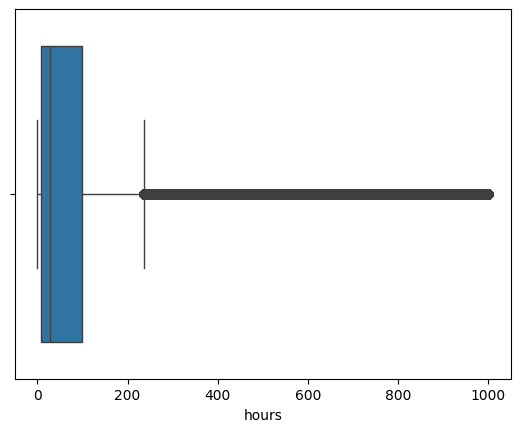

In [ ]:
sns.boxplot(data=recom, x='hours')

A mediana das horas jogadas é 27.3 horas, enquanto a média é de 100.6 horas. Isso indica que para metade das recomendações os jogadores jogaram no máximo 27.3 horas. É possível deduzir também que há registros de horas com valores altos, superiores a 100 horas, que carregam a média para cima, mesmo com 75% das recomendações tendo registros com até 99.2 horas jogadas.

\

In [ ]:
recom_top_help = recom.sort_values(by='helpful', ascending=False)
recom_top_help

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
7760952,1517290,36212,569,2021-11-19,False,39.2,9631072,7760952
4746053,413150,29627,576,2017-06-10,True,483.3,8405232,4746053
5982715,252490,28245,314,2013-12-30,True,204.4,11661294,5982715
28808138,1832640,22364,2573,2022-09-29,False,8.5,2136462,28808138
5561501,730,20450,1047,2014-07-13,True,366.0,10237272,5561501
...,...,...,...,...,...,...,...,...
39618587,225840,0,0,2017-05-22,True,1.0,7363133,39618587
22723562,1151340,0,0,2021-12-28,True,26.9,4521060,22723562
6811859,387990,0,0,2016-11-20,True,43.8,9412763,6811859
37099277,1171370,0,0,2020-02-20,True,0.4,11251666,37099277


In [ ]:
recom_top_funny = recom.sort_values(by='funny', ascending=False)
recom_top_funny

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
5561954,730,8226,21660,2015-07-10,True,229.7,11741131,5561954
5169486,1091500,18539,19396,2020-12-09,True,117.5,5860500,5169486
24673788,1091500,18701,17018,2020-12-09,True,11.0,9876646,24673788
24995080,814380,7846,16387,2019-03-21,True,92.1,9581059,24995080
5790486,730,4932,15873,2015-02-13,True,719.0,4244741,5790486
...,...,...,...,...,...,...,...,...
21851721,1063730,0,0,2021-10-12,False,56.2,2994765,21851721
5570461,534380,0,0,2022-02-20,True,100.7,6271883,5570461
5370678,218620,2,0,2021-07-11,True,5.6,5580919,5370678
23114435,219990,0,0,2018-11-24,True,672.0,3362038,23114435


Recomendações publicadas por mês (out. 2010 - dez. 2022)

In [ ]:
recom['month_year'] = recom['date'].str[:7]

In [ ]:
recom_sort = recom[['review_id', 'month_year']]
recom_sort = recom_sort.sort_values(by='month_year')

In [ ]:
months = recom_sort.month_year.value_counts()

In [ ]:
months_sort = recom_sort.month_year.unique()

In [ ]:
months_sort

array(['2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', 

<Axes: xlabel='month_year'>

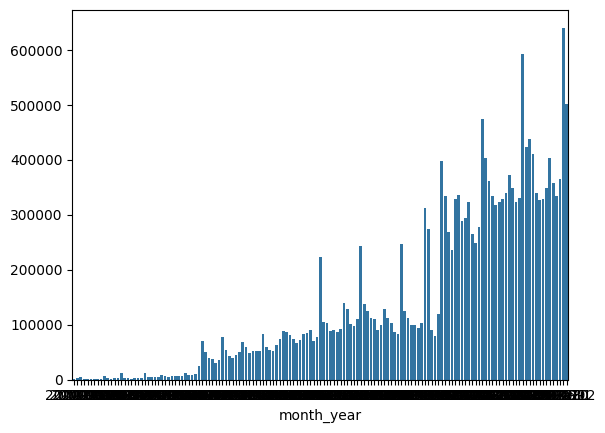

In [ ]:
sns.barplot(x=months.index, y=months.values, order=months_sort)

In [ ]:
is_recom = recom.is_recommended
is_recom.value_counts()

,count
is_recommended,
True,17651061
False,2926336


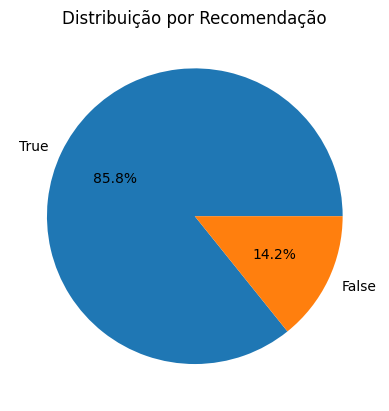

In [ ]:
plt.pie(is_recom.value_counts(), labels=is_recom.unique(), autopct='%1.1f%%')
plt.title('Distribuição por Recomendação')
plt.show()

#### Jogos

In [ ]:
games_df = pd.read_csv("games.csv")
games_df = games_df[games_df['app_id'].isin(recom['app_id'].unique())]
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True


In [ ]:
games_df.user_reviews.describe()

,user_reviews
count,3.719600e+04
mean,2.391919e+03
std,4.682145e+04
min,1.000000e+01
25%,2.100000e+01
50%,6.000000e+01
75%,2.862500e+02
max,7.494460e+06


In [ ]:
games_df.isnull().sum()

,0
app_id,0
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0
user_reviews,0
price_final,0


In [ ]:
print('Qtd. de jogos únicos no dataset:', games_df['app_id'].unique().size)

Qtd. de jogos únicos no dataset: 37196


([<matplotlib.patches.Wedge at 0x7ee13a12dfc0>,
 [Text(-2.0206672185931328e-16, -1.1, 'Jogos com recomendações'),
  Text(3.3677786976552215e-16, 1.1, 'Jogos sem recomendações')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%'),
  Text(1.83697019872103e-16, 0.6, '0.0%')])

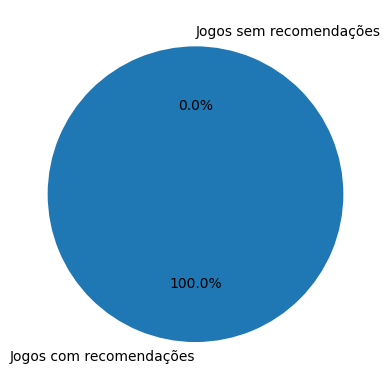

In [ ]:
jogos_c_review = recom['app_id'].unique().size
jogos_s_review = games_df['app_id'].unique().size - jogos_c_review

jogos = [jogos_c_review, jogos_s_review]
labels = ['Jogos com recomendações', 'Jogos sem recomendações']
plt.pie(jogos, labels=labels, autopct='%1.1f%%', startangle=90)

In [ ]:
# Jogos com a 'positive_ratio' máxima aparentemente possuem um número limitado de 'user_reviews'
top_pos_ratio = games_df[games_df['positive_ratio'].max() == games_df['positive_ratio']]
top_pos_ratio.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
367,1640760,WORDLAND 2,2021-06-03,True,False,False,Positive,100,18,1.99,1.99,0.0,True
494,1739300,Smack Studio,2021-09-20,True,False,False,Positive,100,22,14.99,14.99,0.0,True
510,1293900,NOMAD,2020-07-29,True,False,False,Positive,100,28,3.99,3.99,0.0,True
517,1532920,Clutter IX: Clutter IXtreme,2021-03-02,True,False,False,Positive,100,10,9.99,9.99,0.0,True
529,1475420,Puzzling Peaks EXE,2020-12-02,True,False,False,Positive,100,14,2.99,2.99,0.0,True


<Axes: xlabel='user_reviews'>

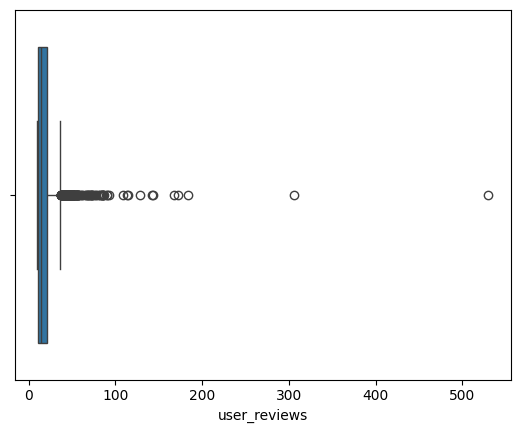

In [ ]:
sns.boxplot(data=top_pos_ratio, x='user_reviews')

In [ ]:
# Jogo com mais reviews entre os com a máxima 'positive_ratio'
top_pos_ratio[top_pos_ratio['user_reviews'].max() == top_pos_ratio['user_reviews']]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2287,2206340,Aokana - Four Rhythms Across the Blue - EXTRA2,2022-12-16,True,False,False,Overwhelmingly Positive,100,530,24.99,24.99,0.0,True


In [ ]:
games_df['rating'].value_counts()

,count
rating,
Very Positive,10478
Mixed,9247
Positive,8128
Mostly Positive,6709
Mostly Negative,1346
Overwhelmingly Positive,1007
Negative,244
Very Negative,30
Overwhelmingly Negative,7


In [ ]:
over_positive = games_df[games_df['rating'] == 'Overwhelmingly Positive']
over_negative = games_df[games_df['rating'] == 'Overwhelmingly Negative']

In [ ]:
# Jogo com mais reviews positivas
over_positive[over_positive['user_reviews'].max() == over_positive['user_reviews']]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
13035,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,943413,10.0,0.0,0.0,True


In [ ]:
# Jogo com mais reviews negativas
over_negative[over_negative['user_reviews'].max() == over_negative['user_reviews']]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
3247,1180320,War of the Three Kingdoms,2021-12-17,True,False,False,Overwhelmingly Negative,15,21276,0.0,0.0,0.0,True


In [ ]:
top_games = games_df[(games_df['positive_ratio'] >= 90) & (games_df['rating'] == 'Overwhelmingly Positive')].sort_values(by=['user_reviews', 'positive_ratio'], ascending=[False, True]).head(20)
top_games[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12800,The Witcher® 3: Wild Hunt,668455,96
47791,Wallpaper Engine,637341,98
12711,Left 4 Dead 2,574470,97
14459,Stardew Valley,505882,98
47538,Euro Truck Simulator 2,494214,97
13203,Phasmophobia,486466,96
11718,The Forest,416113,95
48183,Valheim,356617,95


In [ ]:
rating_count = games_df['rating'].value_counts()
rating_count_df= pd.DataFrame(rating_count).reset_index()
rating_count_df.columns = ['Rating', 'Game Count']

fig= px.bar(rating_count_df, x='Game Count', y='Rating', color='Rating', text_auto= True, title= 'Distribuição de Notas de Jogos', orientation='h')

fig.show()

#### Usuários

In [ ]:
users = pd.read_csv('users.csv')
users = users[users['user_id'].isin(recom['user_id'].unique())]
users.head()

NameError: name 'recom' is not defined

In [ ]:
users.describe()

,user_id,products,reviews
count,9.173223e+06,9.173223e+06,9.173223e+06
mean,7.251852e+06,1.354267e+02,3.861118e+00
std,4.106513e+06,2.785582e+02,9.824710e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.736582e+06,2.800000e+01,1.000000e+00
50%,7.317204e+06,6.600000e+01,2.000000e+00
75%,1.079944e+07,1.480000e+02,4.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [ ]:
users.dtypes

,0
user_id,int64
products,int64
reviews,int64


In [ ]:
users.isnull().sum()

,0
user_id,0
products,0
reviews,0


<Axes: xlabel='reviews'>

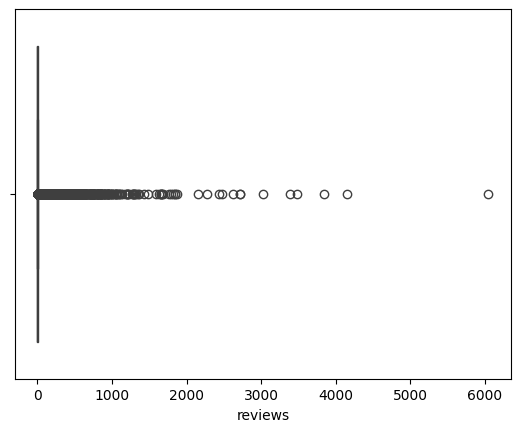

In [ ]:
sns.boxplot(data=users, x='reviews')

<Axes: xlabel='products'>

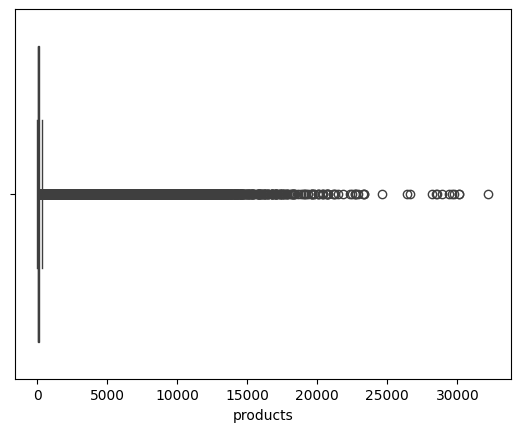

In [ ]:
sns.boxplot(data=users, x='products')

In [ ]:
user_mean_reviews = users.reviews.mean()
user_mean_reviews

3.861117951673038

In [ ]:
user_median_reviews = users.reviews.median()
user_median_reviews

2.0

### Análises por Segmento

#### Recomendações

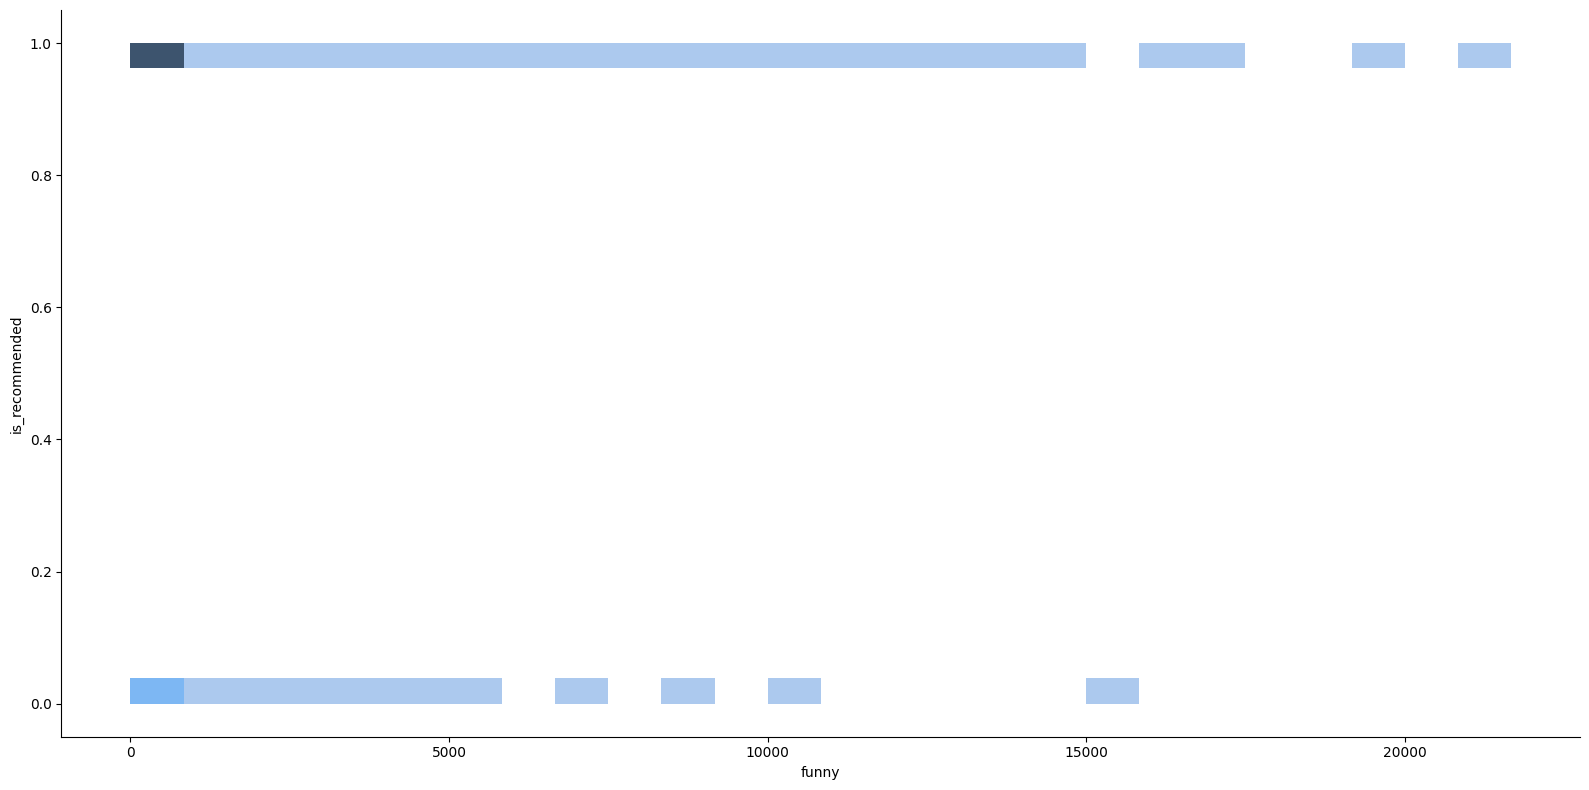

In [ ]:
sns.displot(data=recom, x='funny', y='is_recommended', height=8, aspect=2.0)

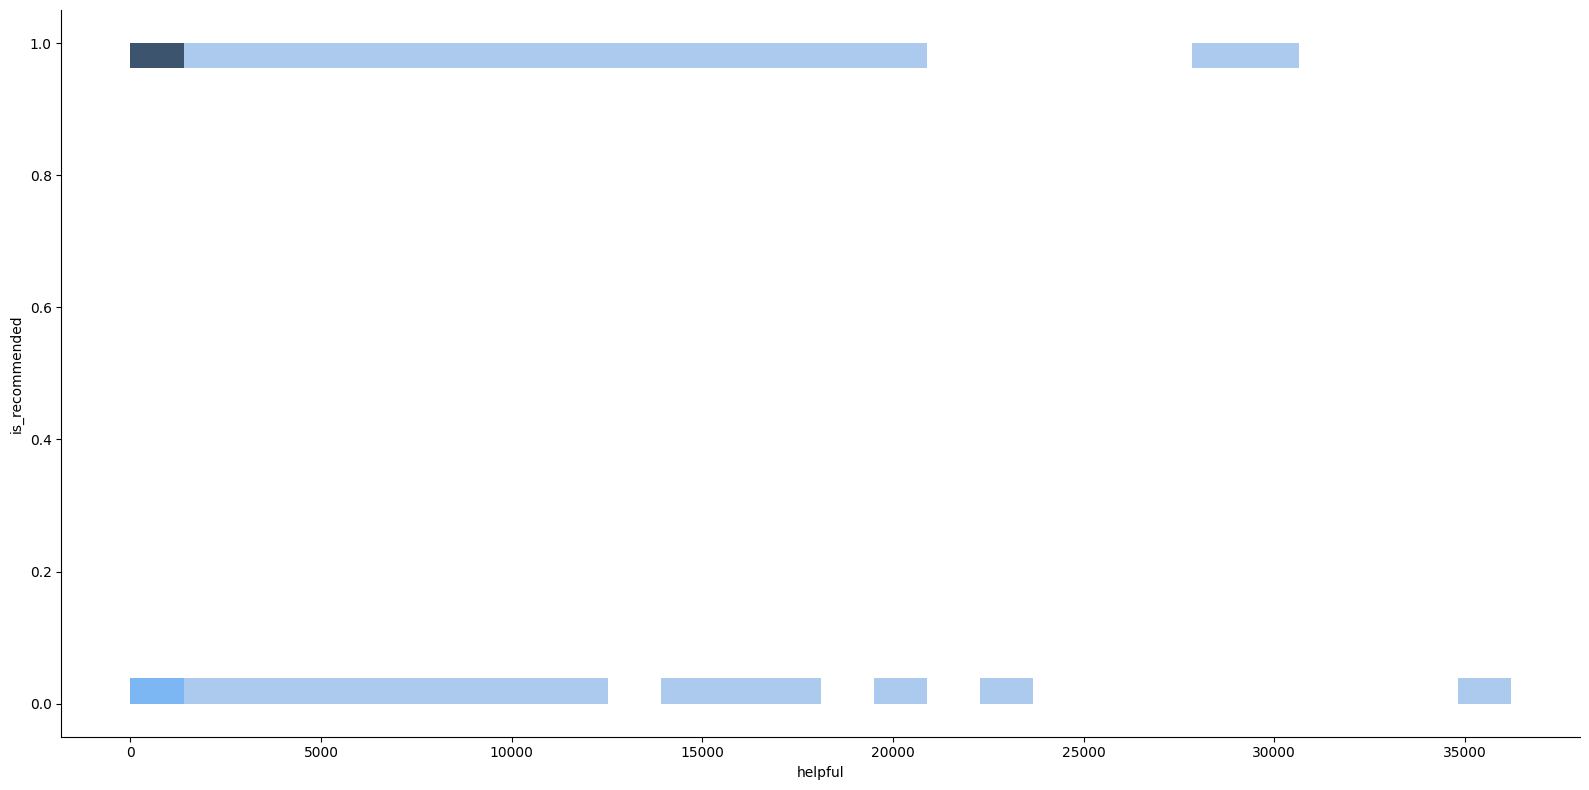

In [ ]:
sns.displot(data=recom, x='helpful', y='is_recommended', height=8, aspect=2.0)

Segmentando os dados com base na recomendação do título, as distribuições para as variáveis `funny` e `helpful` são semelhantes. Apenas com uma diferença para títulos recomendados, que têm mais avaliações com grande quantidade de marcadores *funny* (engraçado/divertido) em relação aos não recomendados.

<Axes: xlabel='is_recommended', ylabel='hours'>

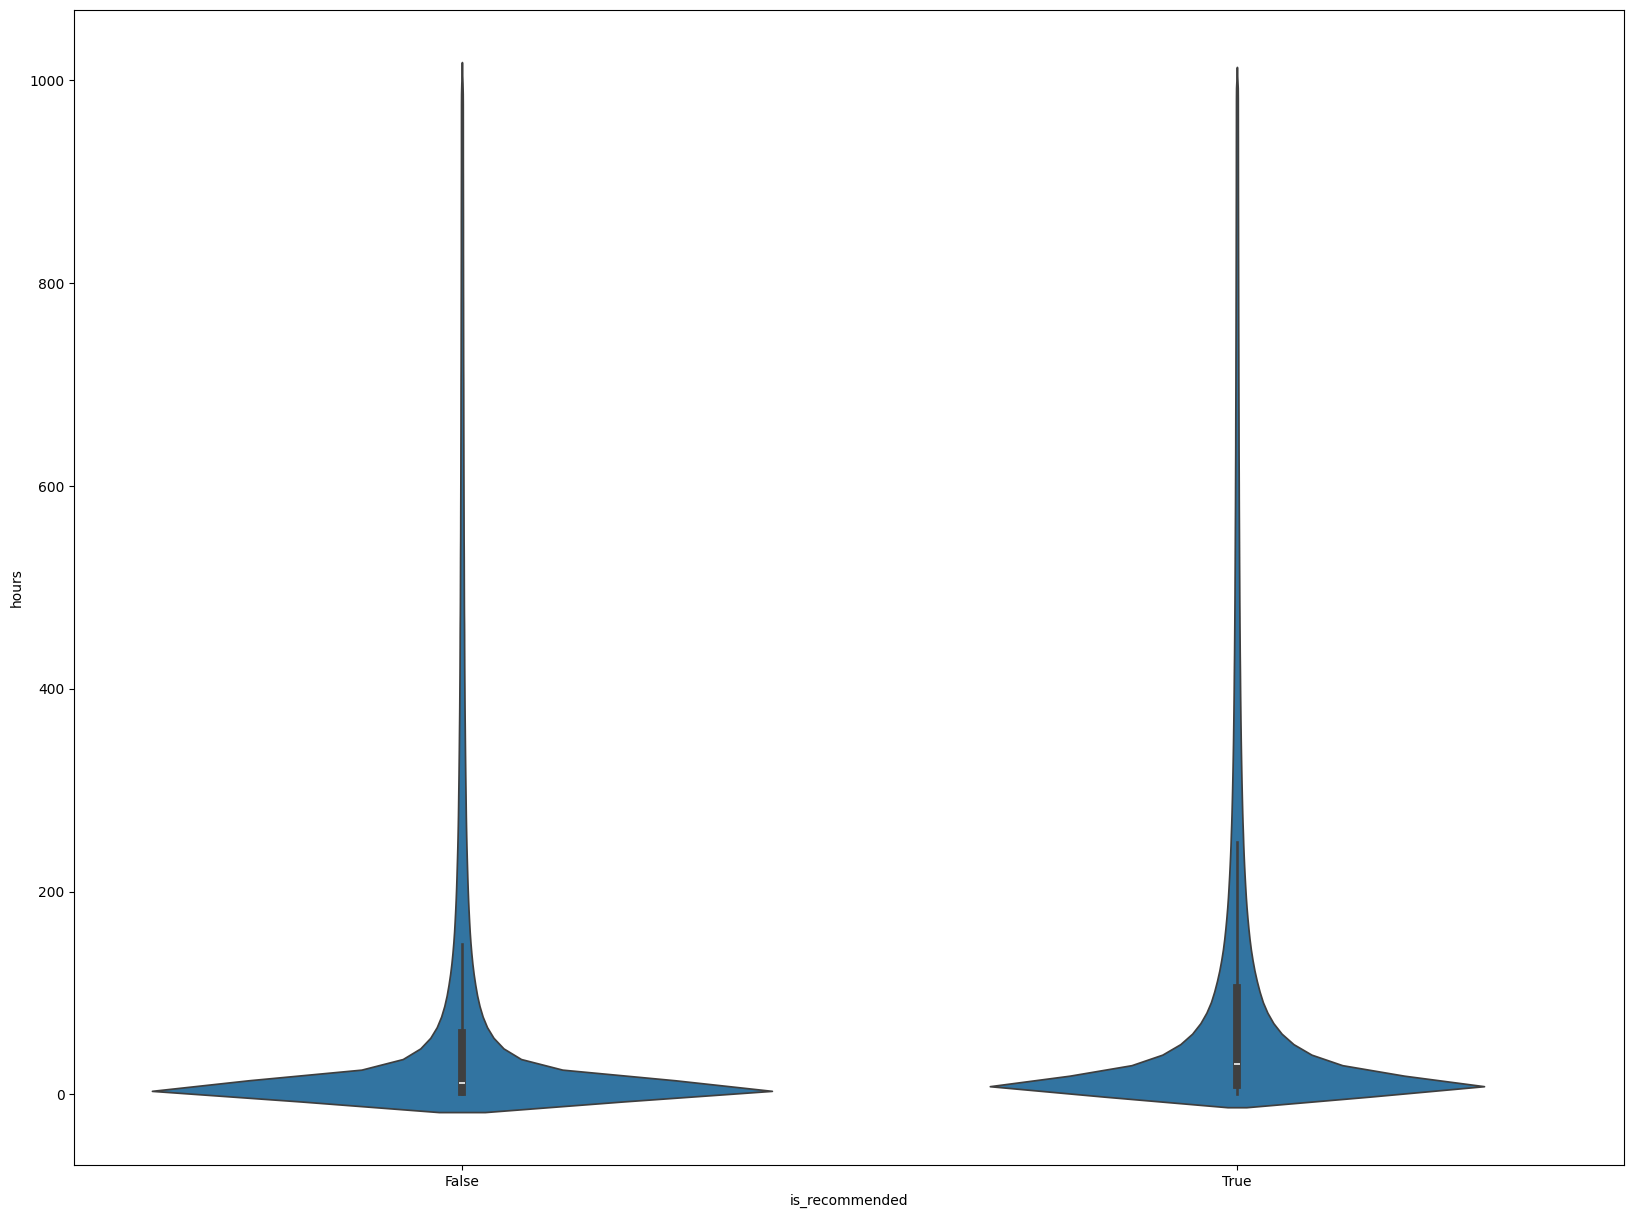

In [ ]:
plt.figure(figsize=(20,15))
sns.violinplot(x='is_recommended', y='hours', data=recom)

Aqui também as distribuições são semelhantes, mas com algumas particularidades:
- Os títulos não recomendados são jogados por menos horas
- Os títulos recomendados tem um pouco mais de horas jogadas em grandes quantidades

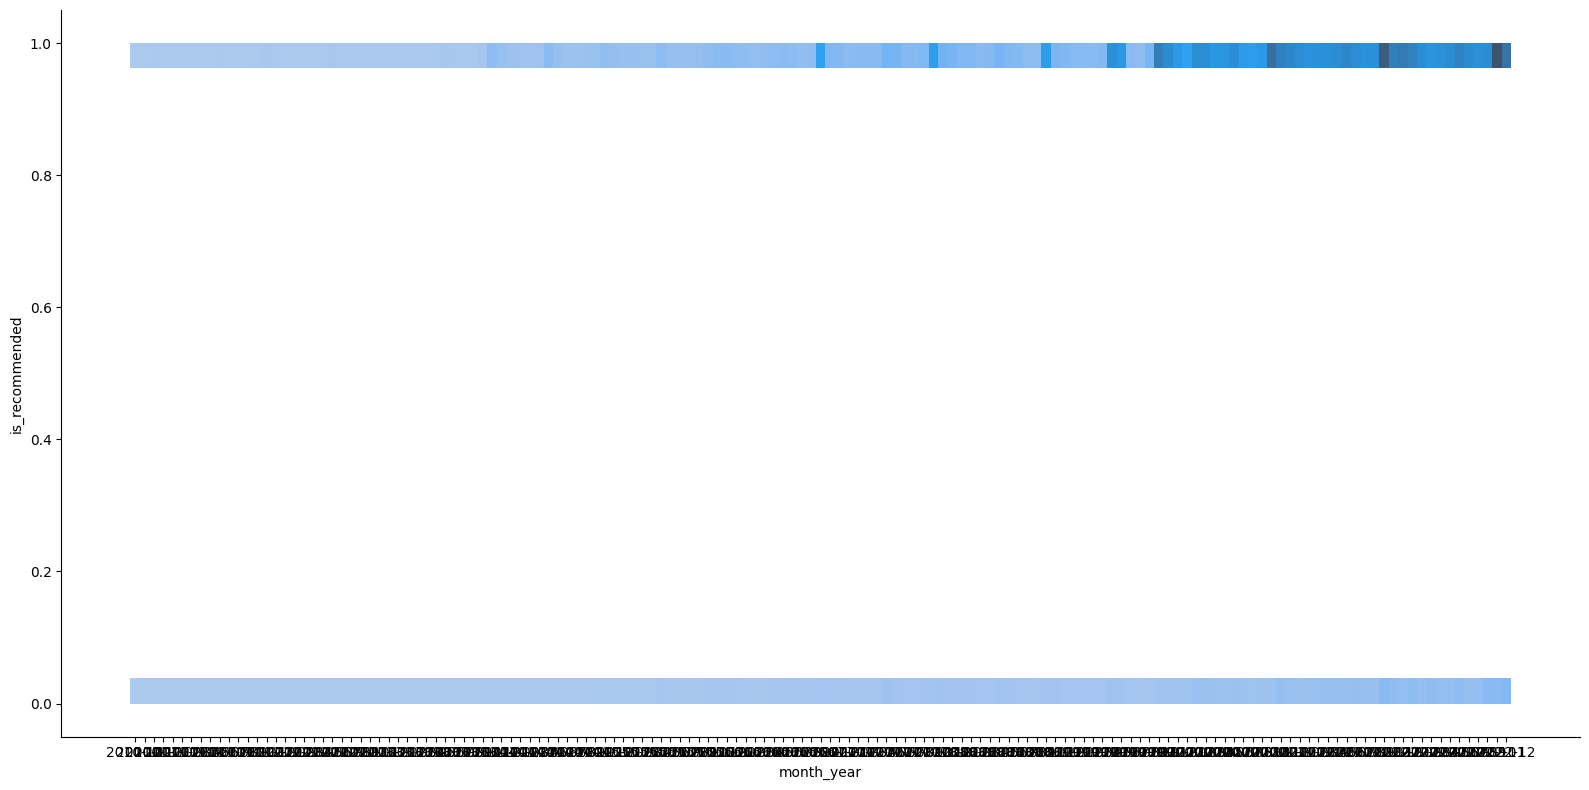

In [ ]:
recom_sort = recom[['is_recommended', 'month_year']].sort_values(by='month_year')
sns.displot(data=recom_sort, x='month_year', y='is_recommended', height=8, aspect=2.0)

A distribuição dos títulos recomendados ao longo do tempo parece seguir a distribuição dos lançamentos, que também foi crescente. Porém, é possível perceber que a distribuição dos não recomendados não mudou muito, enquanto para os recomendados intensificou-se bastante nos últimos anos. Isso pode indicar que a qualidade dos jogos, segundo os usuários, melhorou ao longo do tempo.

#### Jogos

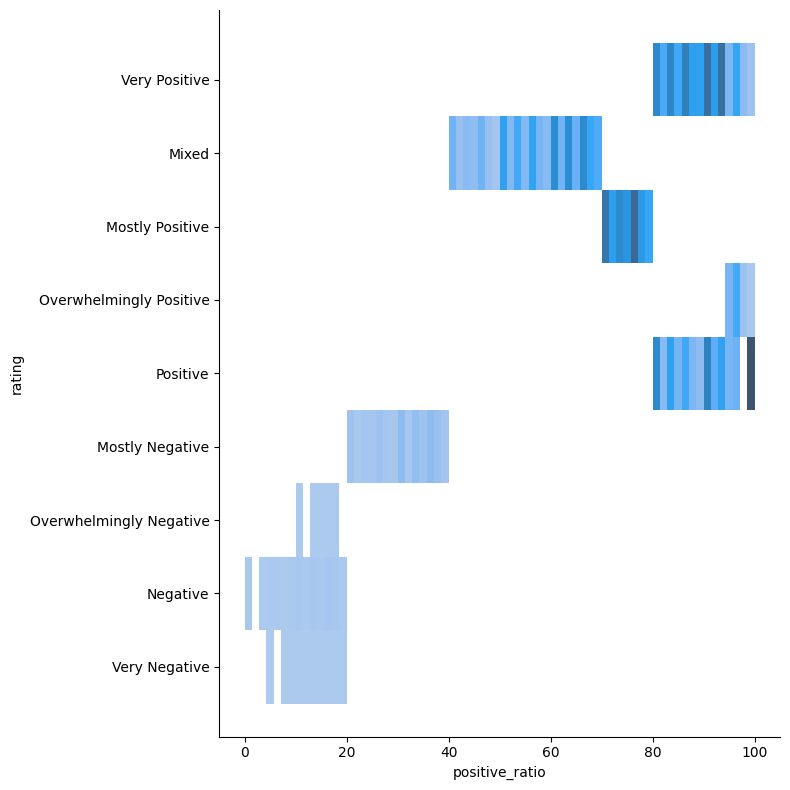

In [ ]:
# @title Distribuição de rating em função de positive_ratio
sns.displot(data=games_df, x='positive_ratio', y='rating', height=8, aspect=1.0)

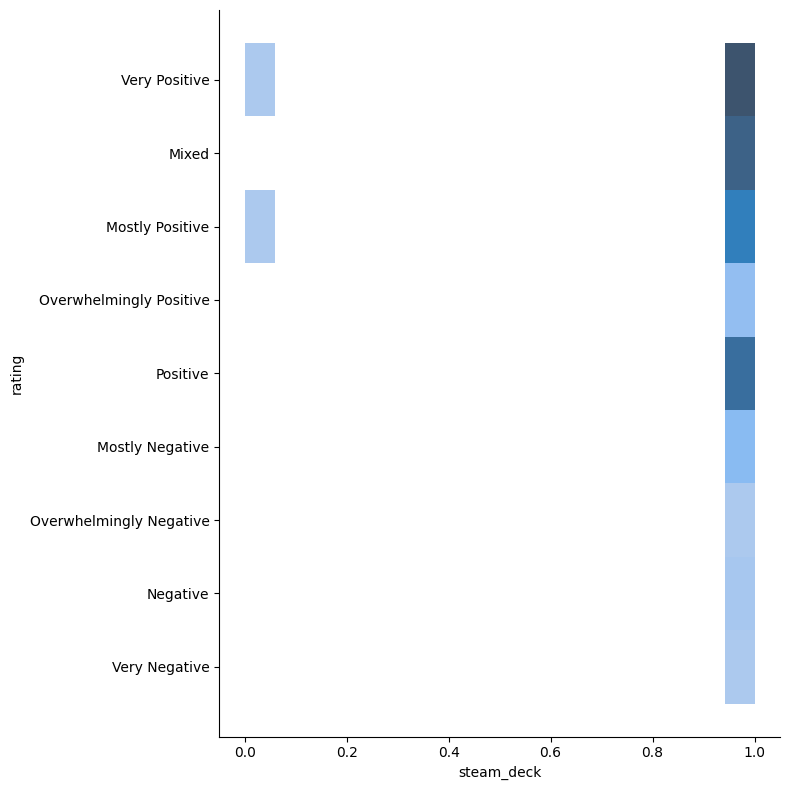

In [ ]:
# @title Distribuição de rating por jogos que estão ou não no steam deck
sns.displot(data=games_df, x='steam_deck', y='rating', height=8, aspect=1.0)

In [ ]:
segment_analysis = games_df.groupby('rating').agg({
    'price_final': 'mean',
    'user_reviews': 'mean',
    'steam_deck': 'sum',
    'positive_ratio': 'mean'
}).reset_index()
segment_analysis

,rating,price_final,user_reviews,steam_deck,positive_ratio
0,Mixed,7.764636,808.005732,9247,57.945280
1,Mostly Negative,7.144175,231.931649,1346,31.403418
2,Mostly Positive,8.666760,1196.891191,6708,74.589656
3,Negative,7.876967,18.245902,244,12.254098
4,Overwhelmingly Negative,11.848571,4405.714286,7,14.857143
5,Overwhelmingly Positive,12.050169,20937.346574,1007,96.213505
6,Positive,6.205235,22.328863,8128,90.720226
7,Very Negative,9.340000,135.966667,30,13.766667
8,Very Positive,10.516013,4948.586753,10477,88.603359


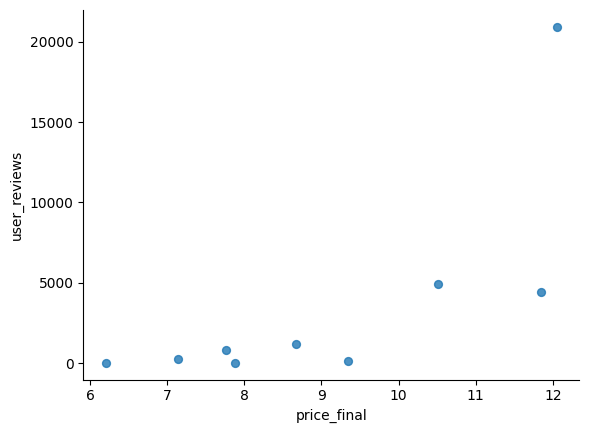

In [ ]:
# @title Scatterplot de price_final vs user_reviews

segment_analysis.plot(kind='scatter', x='price_final', y='user_reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

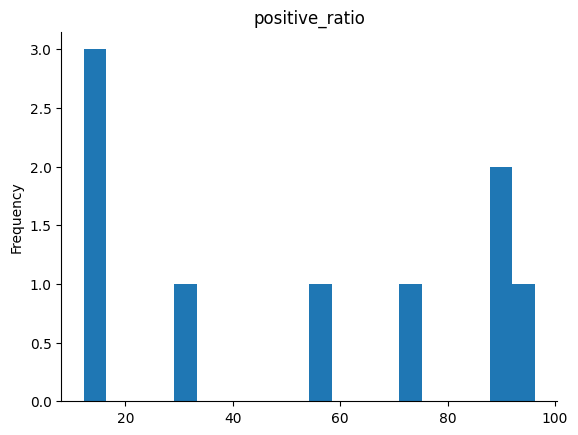

In [ ]:
# @title Histograma de positive_ratio

segment_analysis['positive_ratio'].plot(kind='hist', bins=20, title='positive_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

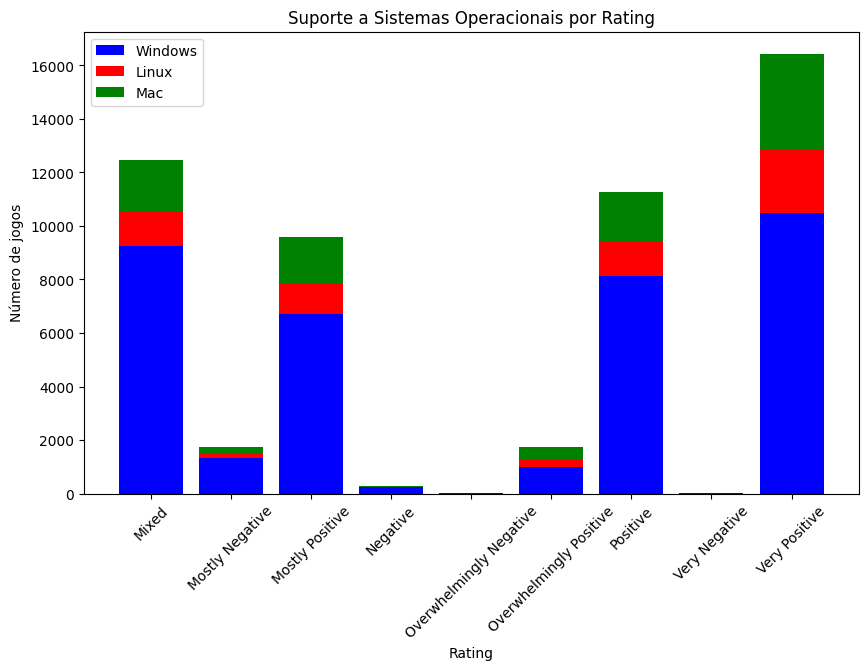

In [ ]:
# @title Suporte a Sistemas Operacionais por Rating
rating_os_support = games_df.groupby('rating').agg({
    'win': 'sum',
    'linux': 'sum',
    'mac': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(rating_os_support['rating'], rating_os_support['win'], label='Windows', color='b')
ax.bar(rating_os_support['rating'], rating_os_support['linux'], bottom=rating_os_support['win'], label='Linux', color='r')
ax.bar(rating_os_support['rating'], rating_os_support['mac'], bottom=rating_os_support['win'] + rating_os_support['linux'], label='Mac', color='g')

ax.set_xlabel('Rating')
ax.set_ylabel('Número de jogos')
ax.set_title('Suporte a Sistemas Operacionais por Rating')
ax.legend()

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x se necessário
plt.show()

### Análises de Correlação

#### Recomendações

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
recom_enc = recom.drop(columns=['app_id', 'date', 'user_id', 'review_id'])
recom_enc = recom_enc.sort_values(by='month_year')
recom_enc

,helpful,funny,is_recommended,hours,month_year
16839194,5,0,True,78.5,2010-10
38229333,0,0,True,11.0,2010-10
17765201,0,0,True,91.6,2010-10
31030083,0,0,True,17.7,2010-10
38962346,0,0,True,36.0,2010-10
...,...,...,...,...,...
30308167,0,0,True,5.5,2022-12
26642901,0,0,False,4.3,2022-12
5182132,0,0,True,71.3,2022-12
3984254,0,0,True,52.1,2022-12


In [ ]:
for col in recom_enc.columns:
  if recom_enc[col].dtype.kind == 'O' or recom_enc[col].dtype.kind == 'b':
    recom_enc[col] = recom_enc[col].astype('category').cat.codes

recom_enc

,helpful,funny,is_recommended,hours,month_year
16839194,5,0,1,78.5,0
38229333,0,0,1,11.0,0
17765201,0,0,1,91.6,0
31030083,0,0,1,17.7,0
38962346,0,0,1,36.0,0
...,...,...,...,...,...
30308167,0,0,1,5.5,146
26642901,0,0,0,4.3,146
5182132,0,0,1,71.3,146
3984254,0,0,1,52.1,146


In [ ]:
recom_enc.dtypes

,0
helpful,int64
funny,int64
is_recommended,int8
hours,float64
month_year,int16


In [ ]:
pearsoncorr = recom_enc.corr(method='pearson')
pearsoncorr

,helpful,funny,is_recommended,hours,month_year
helpful,1.000000,0.488338,-0.026953,0.007799,-0.016439
funny,0.488338,1.000000,-0.003448,0.006661,-0.013670
is_recommended,-0.026953,-0.003448,1.000000,0.045539,0.011199
hours,0.007799,0.006661,0.045539,1.000000,-0.025684
month_year,-0.016439,-0.013670,0.011199,-0.025684,1.000000


<Axes: >

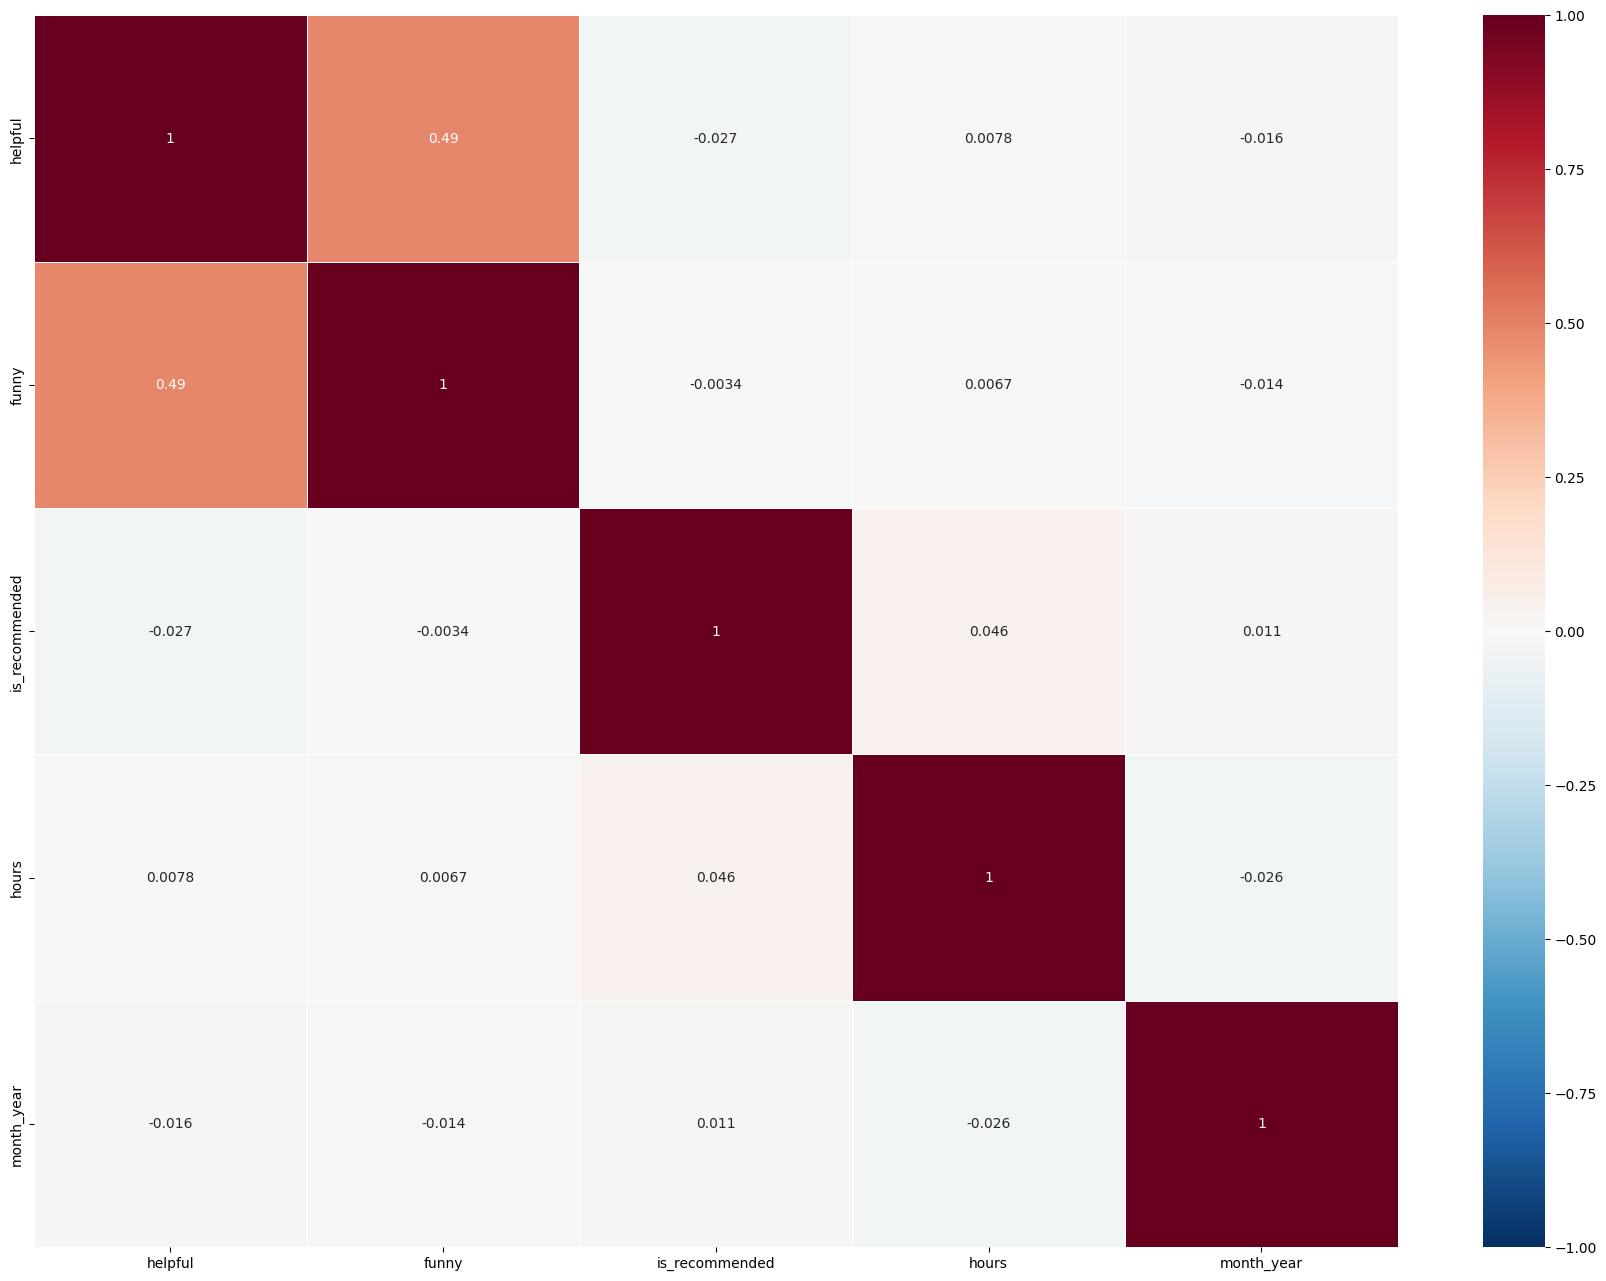

In [ ]:
f, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Aqui vemos uma correlação clara entre as variáveis `helpful` e `funny`, com intensidade moderada (0.49).

In [ ]:
spearmancorr = recom_enc.corr(method='spearman')
spearmancorr

,helpful,funny,is_recommended,hours,month_year
helpful,1.000000,0.406793,-0.197157,-0.040981,-0.161423
funny,0.406793,1.000000,-0.115857,-0.043300,-0.075822
is_recommended,-0.197157,-0.115857,1.000000,0.155980,0.009435
hours,-0.040981,-0.043300,0.155980,1.000000,0.017098
month_year,-0.161423,-0.075822,0.009435,0.017098,1.000000


<Axes: >

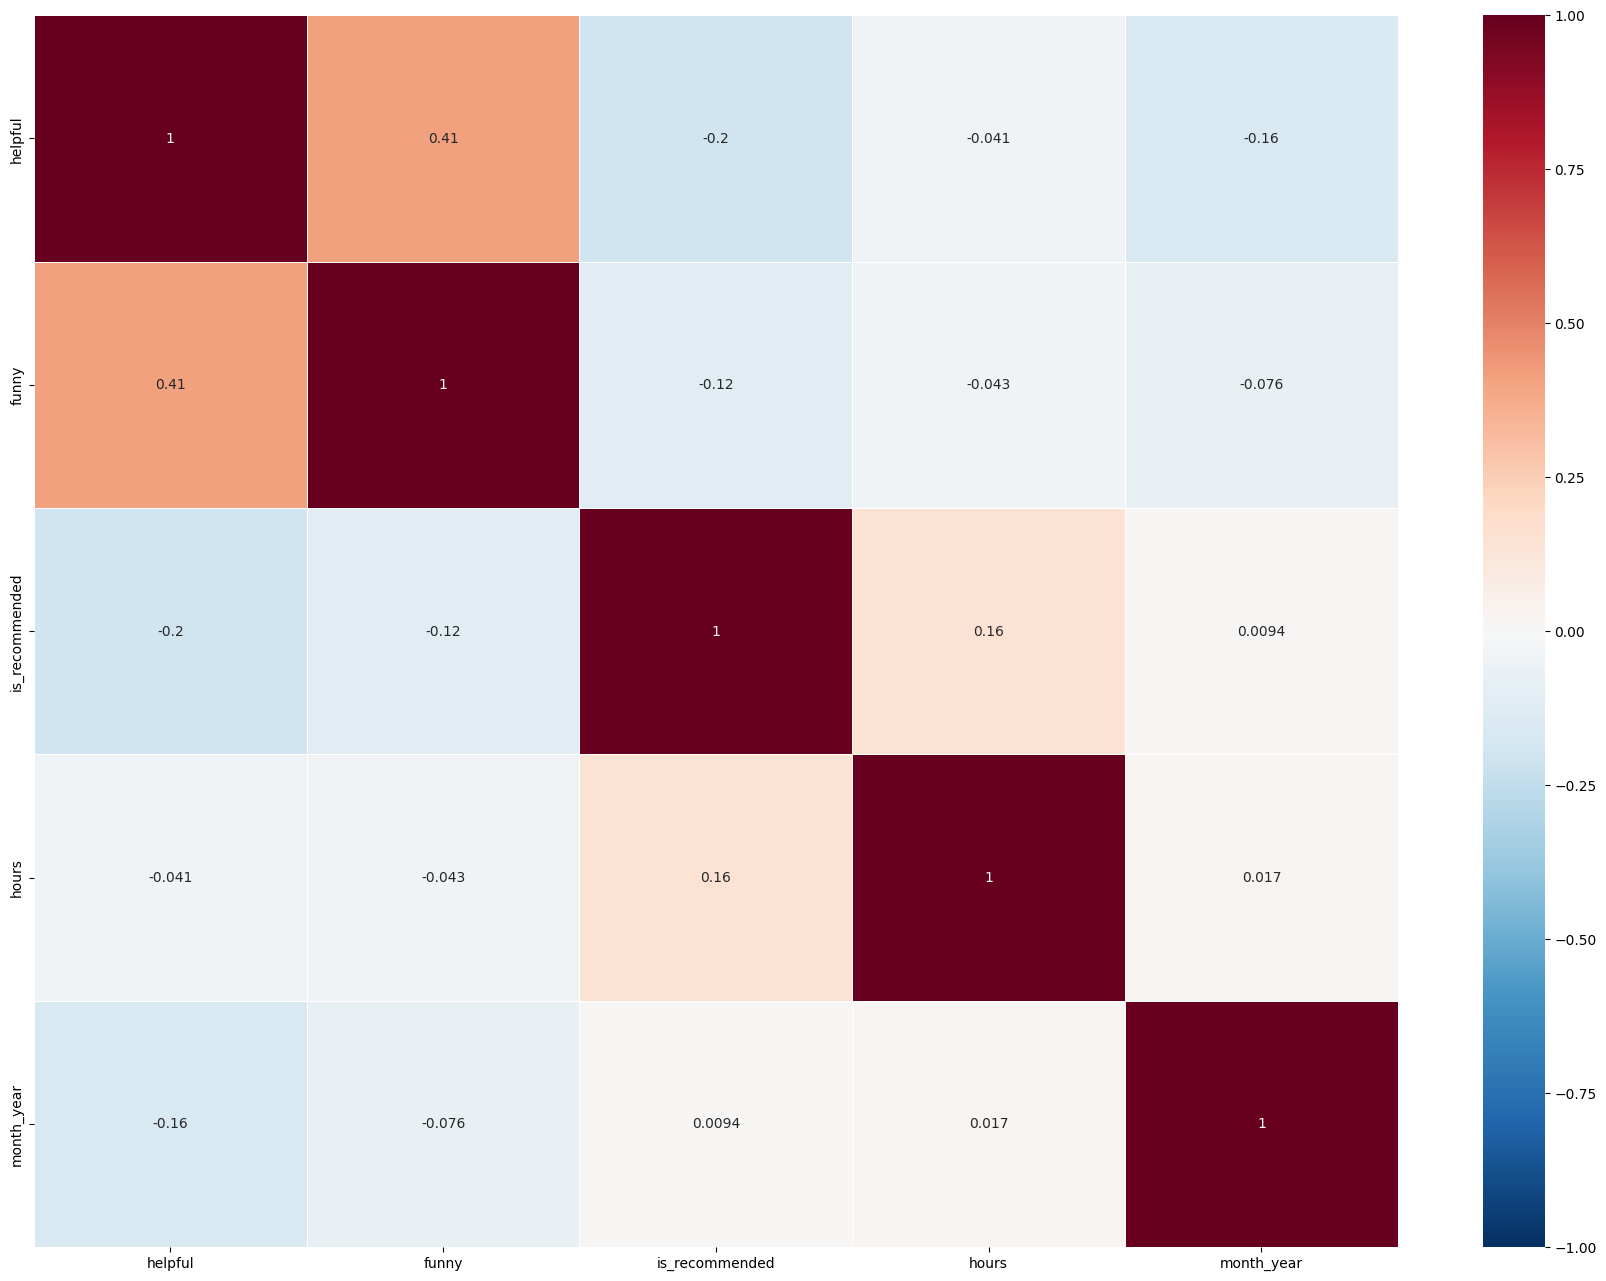

In [ ]:
f, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(spearmancorr,
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Além da já observada, temos outras correlações identificadas utilizando o método de Spearman:
- correlação **negativa** e **fraca** entre `helpful` e `is_recommended`
- correlação **negativa** e **fraca** entre `helpful` e `month_year`
- correlação **negativa** e **fraca** entre `funny` e `is_recommended`
- correlação **positiva** e **fraca** entre `hours` e `is_recommended`

Possíveis interpretações:
- Avaliações de títulos não recomendados recebem mais marcações `helpful` pois usualmente usuários sentem-se mais agradecidos quando uma avaliação os ajuda a não despender esforços em um dado título.
- Avaliações de títulos mais recentes têm menos marcações `helpful` pois tiveram menos tempo para receberem interações.
- Avaliações de títulos não recomendados recebem mais marcações `funny` talvez porque nesses casos os usuários fazem críticas ou comentários irônicos sobre os títulos.
- Títulos recomendados são jogados por mais horas, o que pode ser naturalmente explicado pela qualidade dos mesmos, que motiva os usuários a continuar utilizando os produtos que recomendam.

É possível perceber também que a tolerância a variações nas dispersões da correlação de Spearman consegue capturar mais informações dos dados.

#### Jogos

In [ ]:
games_df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [ ]:
games_df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [ ]:
games_df['month_year_release'] = games_df['date_release'].str[:7]

In [ ]:
games_enc = games_df.drop(columns=['app_id', 'date_release'])
games_enc = games_enc.sort_values(by='month_year_release')
games_enc

,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_year_release
15005,Carmageddon Max Pack,True,False,False,Very Positive,85,428,9.99,9.99,0.0,True,1997-06
31261,POSTAL,True,True,True,Very Positive,85,2329,0.00,0.00,0.0,True,1997-11
47376,Half-Life,True,True,True,Overwhelmingly Positive,96,72475,9.99,9.99,0.0,True,1998-11
8617,Team Fortress Classic,True,True,True,Very Positive,85,5146,4.99,4.99,0.0,True,1999-04
10293,Half-Life: Opposing Force,True,True,True,Overwhelmingly Positive,95,14057,4.99,4.99,0.0,True,1999-11
...,...,...,...,...,...,...,...,...,...,...,...,...
13202,MARVEL SNAP,True,False,False,Very Positive,82,17659,0.00,0.00,0.0,True,2023-08
19117,Hadean Tactics,True,True,True,Very Positive,91,930,20.00,0.00,0.0,True,2023-08
47796,Golf It!,True,True,False,Very Positive,89,18321,9.00,0.00,0.0,True,2023-08
48292,30XX,True,False,False,Very Positive,91,1480,20.00,0.00,0.0,True,2023-08


In [ ]:
games_enc.dtypes

,0
title,object
win,bool
mac,bool
linux,bool
rating,object
positive_ratio,int64
user_reviews,int64
price_final,float64
price_original,float64
discount,float64


In [ ]:
for col in games_enc.columns:
  if (games_enc[col].dtype.kind == 'O' or games_enc[col].dtype.kind == 'b') and col != 'rating':
    games_enc[col] = games_enc[col].astype('category').cat.codes

games_enc

,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_year_release
15005,5099,1,0,0,Very Positive,85,428,9.99,9.99,0.0,1,0
31261,21698,1,1,1,Very Positive,85,2329,0.00,0.00,0.0,1,1
47376,13394,1,1,1,Overwhelmingly Positive,96,72475,9.99,9.99,0.0,1,2
8617,29705,1,1,1,Very Positive,85,5146,4.99,4.99,0.0,1,3
10293,13410,1,1,1,Overwhelmingly Positive,95,14057,4.99,4.99,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13202,17793,1,0,0,Very Positive,82,17659,0.00,0.00,0.0,1,224
19117,13368,1,1,1,Very Positive,91,930,20.00,0.00,0.0,1,224
47796,12731,1,1,0,Very Positive,89,18321,9.00,0.00,0.0,1,224
48292,252,1,0,0,Very Positive,91,1480,20.00,0.00,0.0,1,224


`rating` é uma variável ordinal. Logo, devemos fazer o *encoding* considerando a ordem das categorias.

In [ ]:
games_enc.rating.unique()

array(['Very Positive', 'Overwhelmingly Positive', 'Mostly Positive',
       'Mixed', 'Positive', 'Mostly Negative', 'Very Negative',
       'Negative', 'Overwhelmingly Negative'], dtype=object)

In [ ]:
rating_ord = {
    "Overwhelmingly Negative": 0,
    "Very Negative": 1,
    "Negative": 2,
    "Mostly Negative": 3,
    "Mixed": 4,
    "Mostly Positive": 5,
    "Positive": 6,
    "Very Positive": 7,
    "Overwhelmingly Positive": 8
}

games_enc['rating'] = games_enc['rating'].replace(rating_ord)
games_enc

,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_year_release
15005,5099,1,0,0,7,85,428,9.99,9.99,0.0,1,0
31261,21698,1,1,1,7,85,2329,0.00,0.00,0.0,1,1
47376,13394,1,1,1,8,96,72475,9.99,9.99,0.0,1,2
8617,29705,1,1,1,7,85,5146,4.99,4.99,0.0,1,3
10293,13410,1,1,1,8,95,14057,4.99,4.99,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13202,17793,1,0,0,7,82,17659,0.00,0.00,0.0,1,224
19117,13368,1,1,1,7,91,930,20.00,0.00,0.0,1,224
47796,12731,1,1,0,7,89,18321,9.00,0.00,0.0,1,224
48292,252,1,0,0,7,91,1480,20.00,0.00,0.0,1,224


In [ ]:
pearsoncorr = games_enc.corr(method='pearson')
pearsoncorr

,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_year_release
title,1.000000,0.005170,-0.003005,-0.006900,0.018313,0.018204,-0.006314,0.003471,0.004907,-0.002316,0.010175,0.033292
win,0.005170,1.000000,0.014475,0.007336,-0.013014,-0.014111,0.000711,0.020908,0.021536,0.009373,-0.000225,0.019222
mac,-0.003005,0.014475,1.000000,0.604451,0.119372,0.096102,0.021608,0.018733,0.007405,-0.046341,0.004408,-0.153932
linux,-0.006900,0.007336,0.604451,1.000000,0.100673,0.083446,0.023951,0.018766,0.012216,-0.024589,0.003400,-0.128935
rating,0.018313,-0.013014,0.119372,0.100673,1.000000,0.870630,0.048382,0.084091,0.054188,-0.030067,-0.002640,0.070681
positive_ratio,0.018204,-0.014111,0.096102,0.083446,0.870630,1.000000,0.026901,0.038295,0.025565,-0.005943,-0.003885,0.152413
user_reviews,-0.006314,0.000711,0.021608,0.023951,0.048382,0.026901,1.000000,0.037175,-0.016588,-0.010235,-0.000563,-0.035375
price_final,0.003471,0.020908,0.018733,0.018766,0.084091,0.038295,0.037175,1.000000,0.894907,-0.150164,-0.006053,0.035008
price_original,0.004907,0.021536,0.007405,0.012216,0.054188,0.025565,-0.016588,0.894907,1.000000,0.061633,-0.005814,0.038165
discount,-0.002316,0.009373,-0.046341,-0.024589,-0.030067,-0.005943,-0.010235,-0.150164,0.061633,1.000000,0.002240,0.019329


<Axes: >

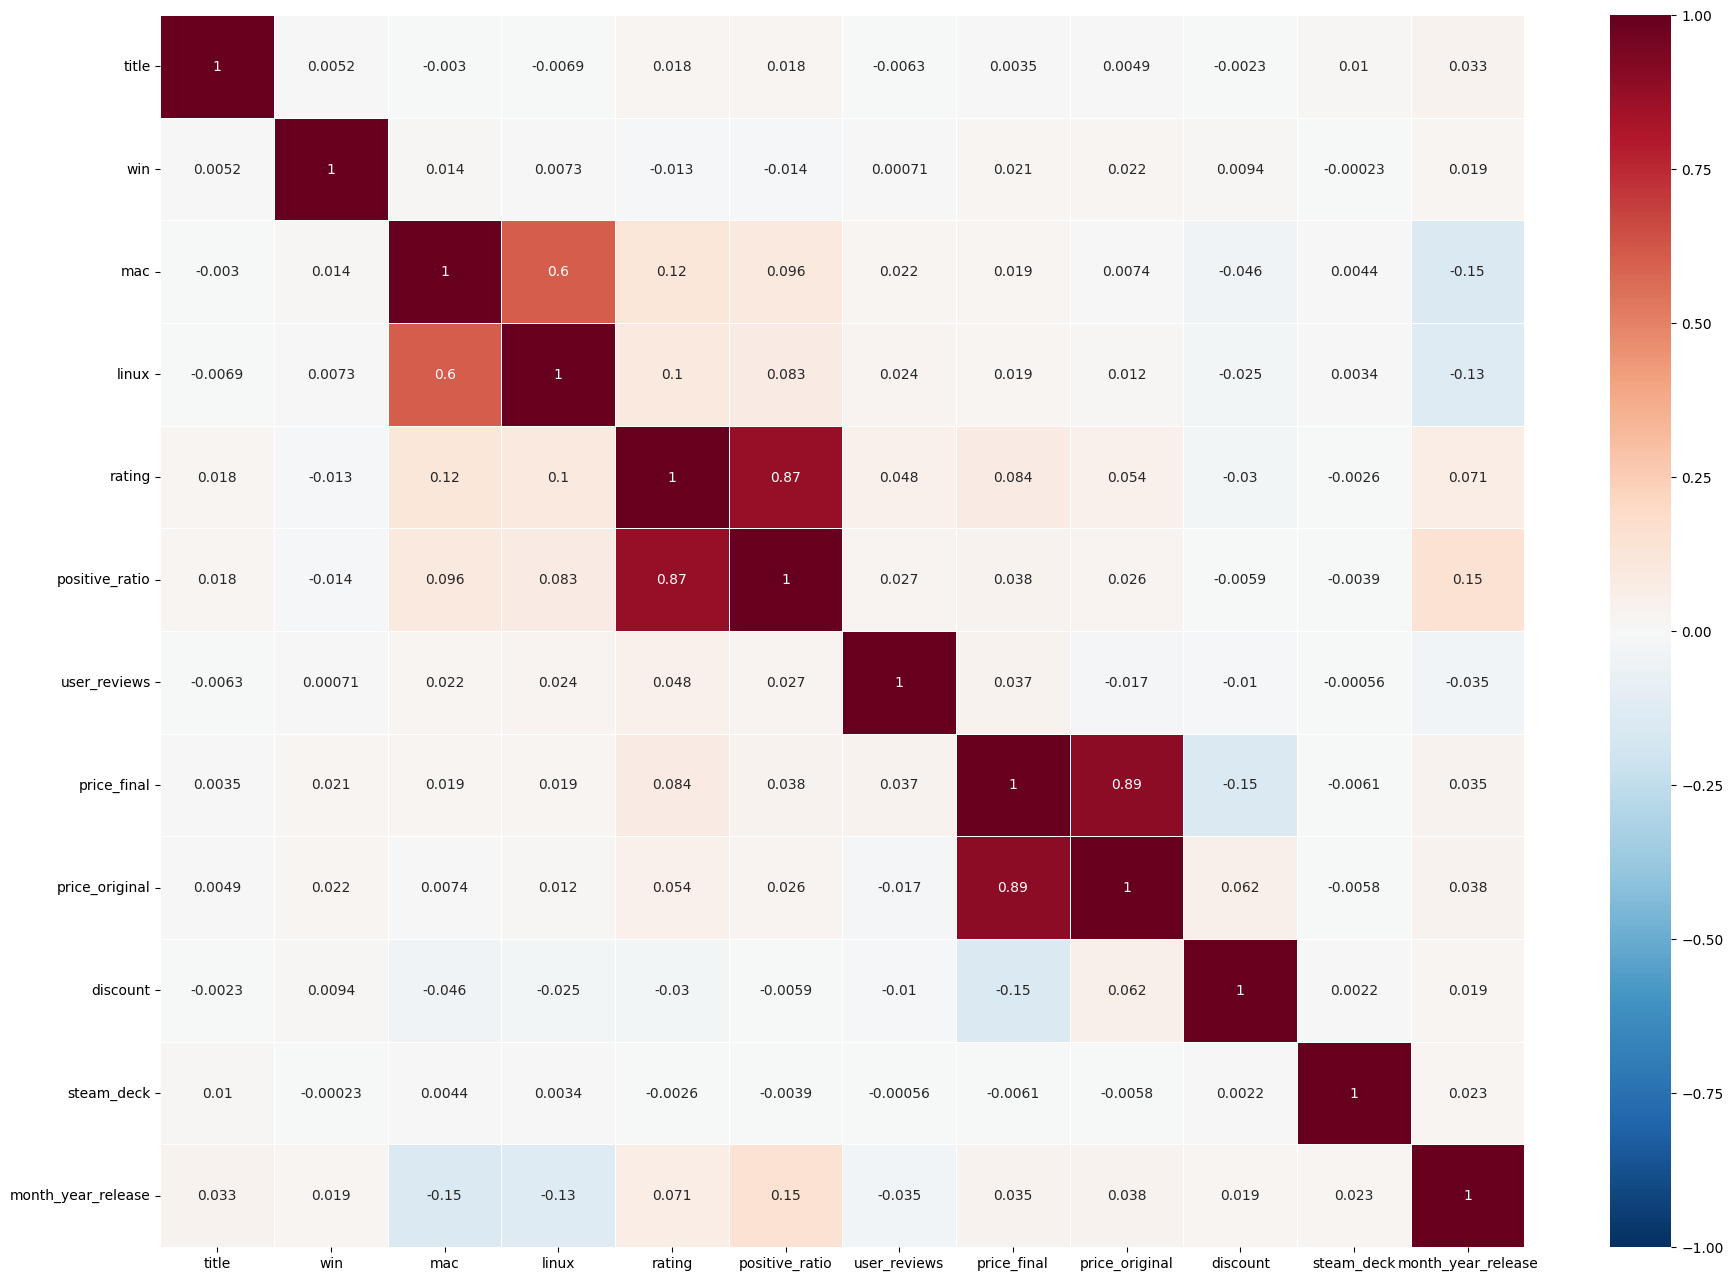

In [ ]:
f, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Utilizando o método de correlação de Pearson no *dataset* de jogos, temos:
- Uma correlação **moderada** para **forte** e **positiva** (0.6) entre o suporte para sistemas Linux e Mac, talvez pelo fato de que quando uma empresa decide publicar com suporte para além do Windows, faz com grande frequência também para todos os SOs.
- Correlação **fraca** e **positiva** entre o suporte a sistemas Mac e Linux e o *overall* das avaliações de um título (`rating`).
- Correlação **fraca** e **negativa** entre o suporte a sistemas Mac e Linux e a época de lançamento, ou seja, ao passar do tempo a quantidade de títulos ofertados para essas plataformas diminuiu.
- Correlação **fraca** e **positiva** entre a proporção de *feedbacks* positivos e a época de lançamento, o que significa que ao longo do tempo a `positive_ratio` aproximou-se mais do polo positivo para as avaliações.
- A correlação forte e positiva entre `rating` e `positive_ratio` é trivial, bem como para a entre `price_final` e `price_original`.
- A correlação fraca e negativa entre `price_final` e `discount` também é trivial.

\

In [ ]:
spearmancorr = games_enc.corr(method='spearman')
spearmancorr

,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,month_year_release
title,1.000000,0.005173,-0.003005,-0.006899,0.017823,0.019053,0.013380,-0.000677,0.001186,-0.000068,0.010178,0.031667
win,0.005173,1.000000,0.014475,0.007336,-0.012647,-0.017800,0.003163,0.040119,0.039532,0.009981,-0.000225,0.025313
mac,-0.003005,0.014475,1.000000,0.604451,0.121305,0.095659,0.123543,0.062854,0.045989,-0.047322,0.004408,-0.177979
linux,-0.006899,0.007336,0.604451,1.000000,0.101782,0.085142,0.092934,0.052351,0.041489,-0.024829,0.003400,-0.150489
rating,0.017823,-0.012647,0.121305,0.101782,1.000000,0.852175,0.387304,0.126563,0.085107,-0.018197,-0.002803,0.093096
positive_ratio,0.019053,-0.017800,0.095659,0.085142,0.852175,1.000000,0.139363,0.077898,0.052716,0.002962,-0.003738,0.199375
user_reviews,0.013380,0.003163,0.123543,0.092934,0.387304,0.139363,1.000000,0.216016,0.148336,-0.068188,-0.009704,-0.212408
price_final,-0.000677,0.040119,0.062854,0.052351,0.126563,0.077898,0.216016,1.000000,0.905329,-0.147567,-0.000804,-0.029818
price_original,0.001186,0.039532,0.045989,0.041489,0.085107,0.052716,0.148336,0.905329,1.000000,0.095949,-0.000901,-0.024774
discount,-0.000068,0.009981,-0.047322,-0.024829,-0.018197,0.002962,-0.068188,-0.147567,0.095949,1.000000,0.002385,0.050520


<Axes: >

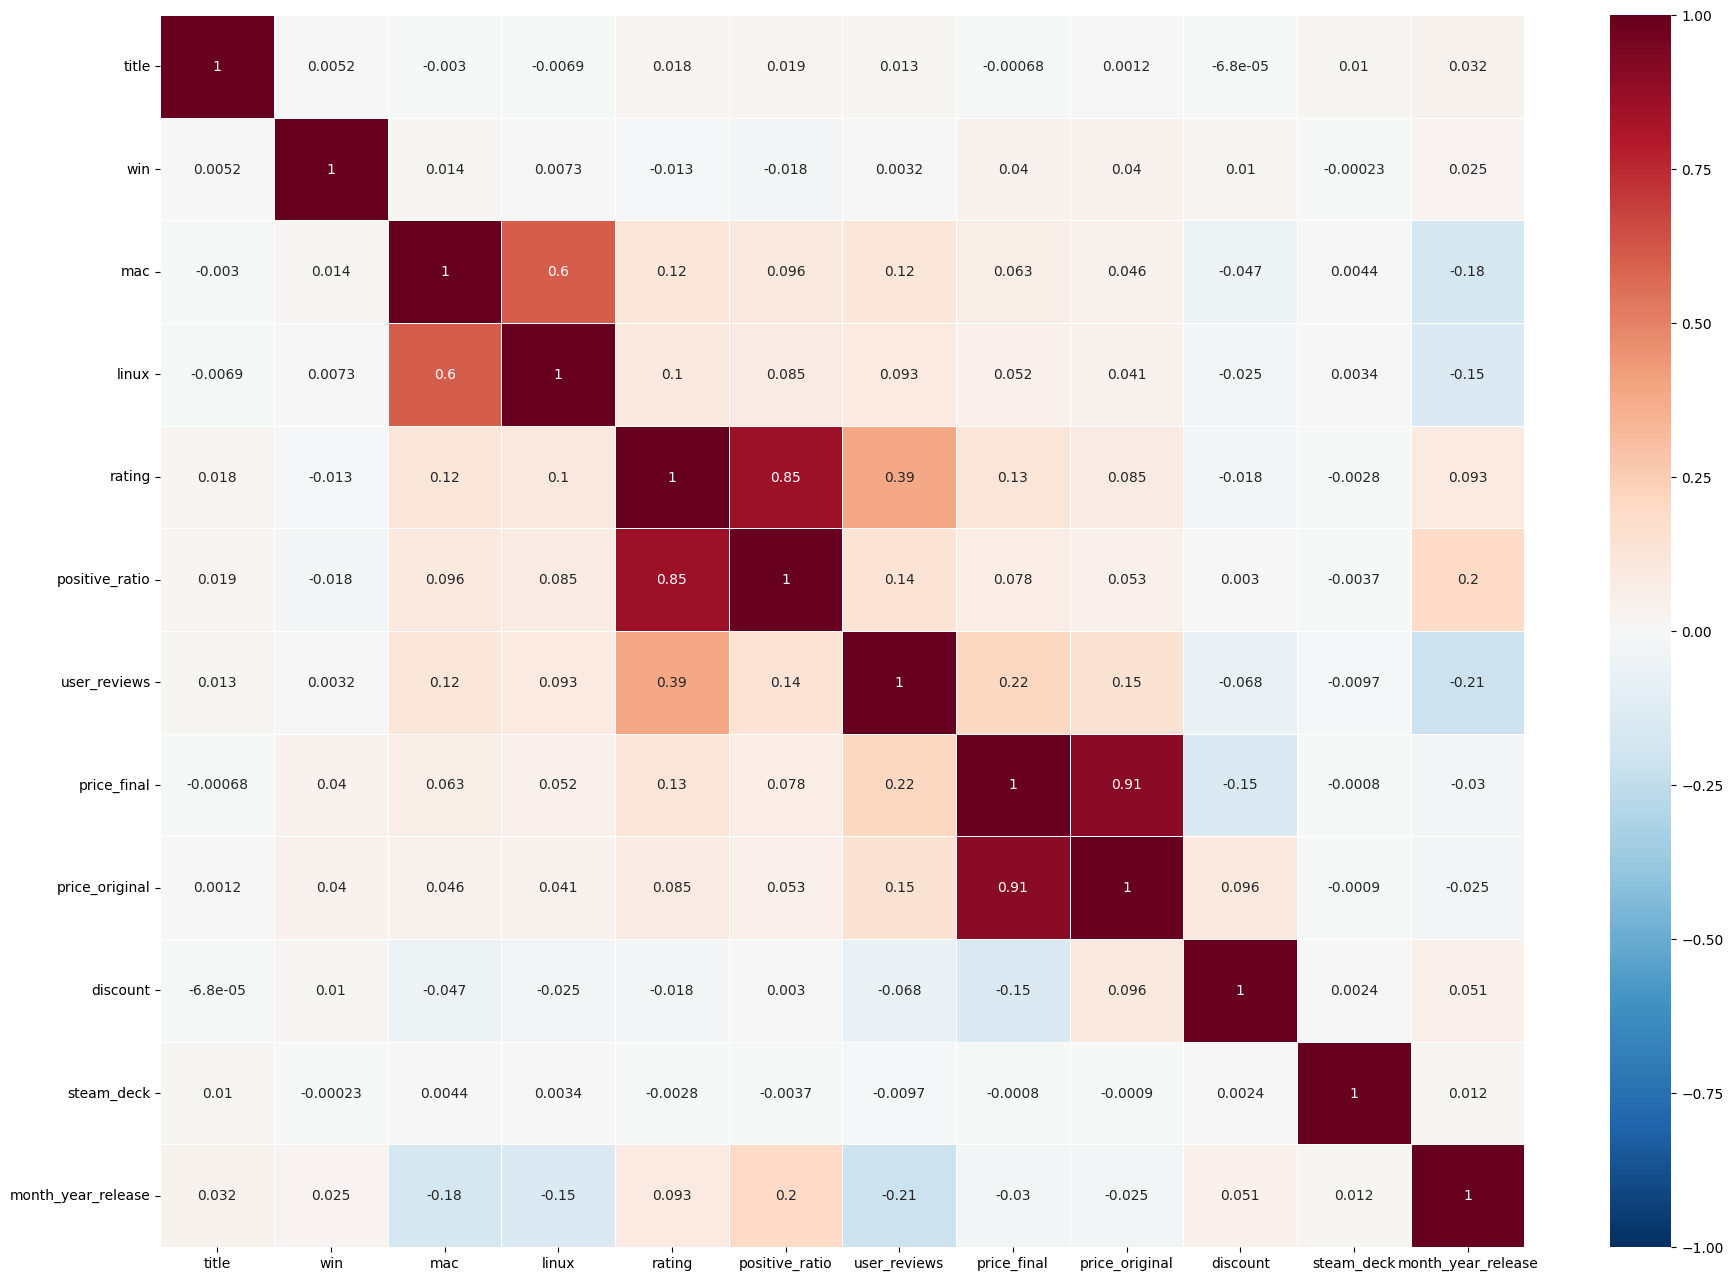

In [ ]:
f, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(spearmancorr,
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1,
            vmax=1)

Para o método de correlação de Spearman, temos:
- O mesmo comportamento para as variáveis já mencionadas.
- Correlação **moderada** e **positiva** entre `rating` e `user_reviews`. Ou seja, jogos com boa avaliação recebem mais *reviews*, talvez por serem mais recomendados e adquirirem mais usuários pela sua reputação. A variável `positive_ratio` acompanha esse comportamento, porém com menor correlação (0.14).
- Correlação **fraca** e **positiva** (0.13) entre `rating` e `price_final`, o que revela que para uma parcela dos títulos, conforme o preço aumenta as avaliações são melhores. Esse comportamento também aparece entre a quantidade de *reviews* de um título e o seu preço. Uma possível explicação é que existem muitos jogos de menor valor com poucos usuários (jogos *indie*, por exemplo) e alguns jogos mais populares que são mais caros, justamente pela sua procura.
- A correlação fraca e positiva entre o suporte a Mac e Linux e a quantidade de *reviews* publicados é trivial, pois com suporte ampliado mais usuários podem consumir e avaliar os produtos.
- A correlação entre a quantidade de *reviews* e a época de lançamento de um título também é trivial, pois títulos publicados a mais tempo tiveram mais oportunidade de receberem *reviews*.

#### Usuários

          products   reviews
products  1.000000  0.249483
reviews   0.249483  1.000000


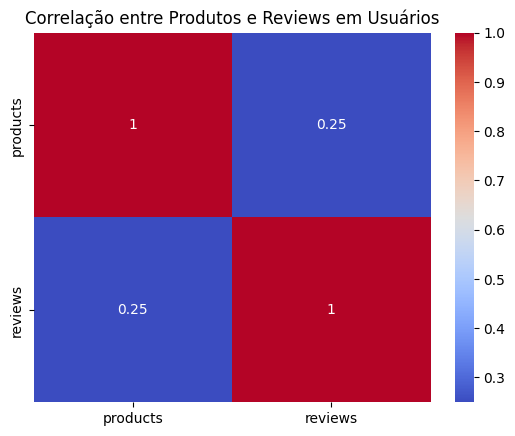

In [ ]:
correlation_users = users[['products', 'reviews']].corr()
print(correlation_users)
sns.heatmap(correlation_users, annot=True, cmap='coolwarm')
plt.title('Correlação entre Produtos e Reviews em Usuários')
plt.show()


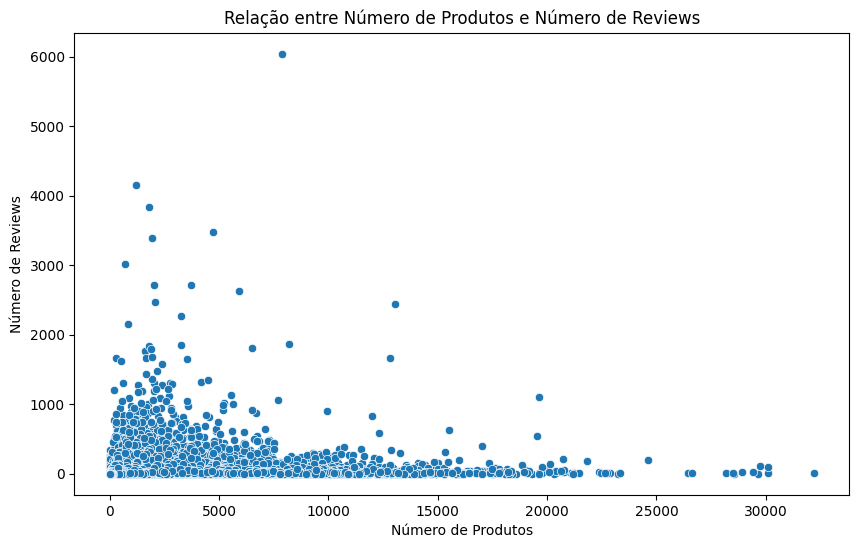

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='products', y='reviews', data=users)
plt.title('Relação entre Número de Produtos e Número de Reviews')
plt.xlabel('Número de Produtos')
plt.ylabel('Número de Reviews')
plt.show()

In [ ]:
fig = px.scatter(users, x='products', y='reviews',
                 title="Correlação entre Produtos Comprados e Avaliações",
                 labels={'products': 'Número de Produtos', 'reviews': 'Avaliações'},
                 text='user_id')
fig.update_traces(textposition='top center')
fig.show()

Buffered data was truncated after reaching the output size limit.

### Agrupamento

#### Recomendações

In [ ]:
recom.columns

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id', 'month_year'],
      dtype='object')

In [ ]:
sample = recom.sample(frac=1.0)
recom_normalized = sample.drop(columns=['app_id', 'date', 'user_id', 'review_id'])

for col in recom_normalized.columns:
  if recom_normalized[col].dtype.kind == 'b':
    recom_normalized[col] = recom_normalized[col].astype('category').cat.codes

recom_normalized

,helpful,funny,is_recommended,hours
32345993,3,0,0,26.3
20167091,0,0,1,25.4
20444514,0,0,1,349.0
22418700,2,0,1,10.2
3262032,3,0,1,158.1
...,...,...,...,...
21103897,0,0,1,11.9
15110754,0,0,1,9.2
21317102,7,3,1,230.5
17949726,0,0,1,0.7


In [ ]:
# Escreva seu código aqui
recom_normalized = (recom_normalized - recom_normalized.min()) / (recom_normalized.max() - recom_normalized.min())

KeyError: "['review'] not found in axis"

In [ ]:
recom_normalized

,helpful,funny,is_recommended,hours
32345993,0.000083,0.000000,0.0,0.0263
20167091,0.000000,0.000000,1.0,0.0254
20444514,0.000000,0.000000,1.0,0.3490
22418700,0.000055,0.000000,1.0,0.0102
3262032,0.000083,0.000000,1.0,0.1581
...,...,...,...,...
21103897,0.000000,0.000000,1.0,0.0119
15110754,0.000000,0.000000,1.0,0.0092
21317102,0.000193,0.000139,1.0,0.2305
17949726,0.000000,0.000000,1.0,0.0007


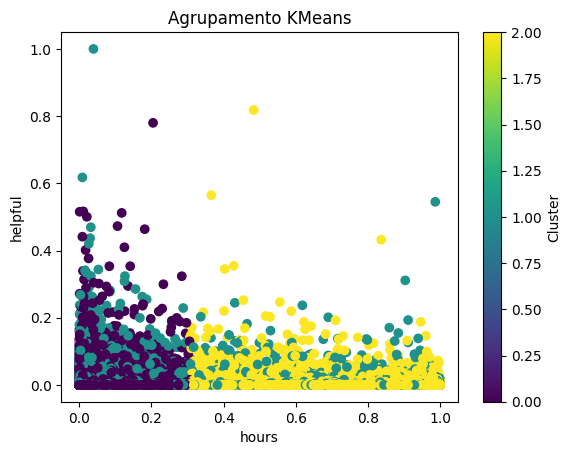

In [ ]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
n_clusters = 3

# Criando o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustando o modelo e prevendo os clusters
recom_normalized['cluster'] = kmeans.fit_predict(recom_normalized)

# Plotando os resultados
plt.scatter(recom_normalized.hours, recom_normalized.helpful, c=recom_normalized.cluster, cmap='viridis', marker='o')
plt.xlabel('hours')
plt.ylabel('helpful')
plt.title('Agrupamento KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
recom_normalized.cluster.value_counts()

,count
cluster,
0,15853775
1,2926336
2,1797286


#### Jogos

In [ ]:
games_df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [ ]:
sample = games_df.sample(frac=1.0)
games_normalized = sample[['positive_ratio', 'price_original']]

games_normalized

,positive_ratio,price_original
48529,96,0.00
35279,71,9.99
34028,81,5.99
34645,52,9.99
48694,64,24.99
...,...,...
2102,90,1.99
8025,70,0.00
14876,94,7.99
33442,20,1.99


In [ ]:
# Escreva seu código aqui
games_normalized = (games_normalized - games_normalized.min()) / (games_normalized.max() - games_normalized.min())

In [ ]:
games_normalized

,positive_ratio,price_original
48529,0.96,0.000000
35279,0.71,0.037001
34028,0.81,0.022186
34645,0.52,0.037001
48694,0.64,0.092559
...,...,...
2102,0.90,0.007371
8025,0.70,0.000000
14876,0.94,0.029594
33442,0.20,0.007371


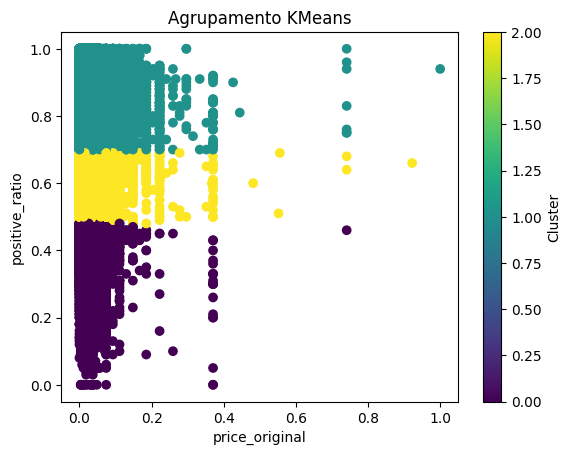

In [ ]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
n_clusters = 3

# Criando o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustando o modelo e prevendo os clusters
games_normalized['cluster'] = kmeans.fit_predict(games_normalized)

# Plotando os resultados
plt.scatter(games_normalized.price_original, games_normalized.positive_ratio, c=games_normalized.cluster, cmap='viridis', marker='o')
plt.xlabel('price_original')
plt.ylabel('positive_ratio')
plt.title('Agrupamento KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
games_normalized.cluster.value_counts()

,count
cluster,
1,26322
2,7782
0,3092


#### Usuários

In [ ]:
users.columns

Index(['user_id', 'products', 'reviews'], dtype='object')

In [ ]:
sample = users.sample(frac=1.0)
users_normalized = sample[['products', 'reviews']]
users_normalized

,products,reviews
13233808,31,1
959911,72,1
8985721,59,3
12626035,105,1
10293613,60,5
...,...,...
5660677,132,1
9979106,43,1
6706366,19,8
9066417,40,1


In [ ]:
# Escreva seu código aqui
users_normalized = (users_normalized - users_normalized.min()) / (users_normalized.max() - users_normalized.min())

In [ ]:
users_normalized

,products,reviews
13233808,0.000962,0.000165
959911,0.002235,0.000165
8985721,0.001832,0.000496
12626035,0.003259,0.000165
10293613,0.001863,0.000827
...,...,...
5660677,0.004098,0.000165
9979106,0.001335,0.000165
6706366,0.000590,0.001323
9066417,0.001242,0.000165


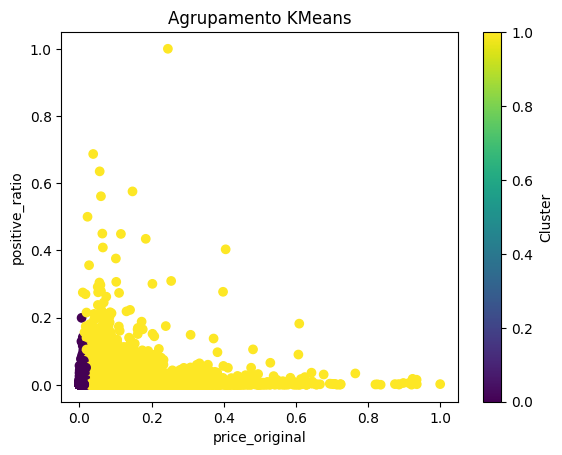

In [ ]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
n_clusters = 2

# Criando o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustando o modelo e prevendo os clusters
users_normalized['cluster'] = kmeans.fit_predict(users_normalized)

# Plotando os resultados
plt.scatter(users_normalized.products, users_normalized.reviews, c=users_normalized.cluster, cmap='viridis', marker='o')
plt.xlabel('products')
plt.ylabel('reviews')
plt.title('Agrupamento KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
users_normalized.cluster.value_counts()

,count
cluster,
0,14034053
1,272011


### Amostragem e Intervalos de Confiança

In [ ]:
def bootstrap(data, func, alpha=0.95, n_rep=1000):

  theta_hat_error_list = list()
  theta = func(data)

  # Resampling
  for i in range(n_rep):
    x = resample(data, replace=True)
    theta_hat_error = theta - func(x)
    theta_hat_error_list.append(theta_hat_error)

  # Percentiles
  lower_p = ((1.0-alpha)/2.0) * 100
  upper_p = (alpha+((1.0-alpha)/2.0)) * 100

  # Lower and Upper Bounds
  lower_value = np.percentile(theta_hat_error_list, lower_p)
  upper_value = np.percentile(theta_hat_error_list, upper_p)

  lower_limit = theta+lower_value
  upper_limit = theta+upper_value

  return theta, lower_limit, upper_limit

####Jogos

In [ ]:
games_df[['positive_ratio','user_reviews','price_final']]

,positive_ratio,user_reviews,price_final
0,84,2199,9.99
2,92,3722,14.99
3,61,873,14.99
4,88,8784,11.99
5,90,5579,7.99
...,...,...,...
50783,93,75060,40.00
50786,85,1154,60.00
50787,97,225815,15.00
50788,91,30937,50.00


##### Médias de nota, número de reviews e preço

In [ ]:
theta_means = np.mean(games_df[['positive_ratio','user_reviews','price_final']]
                      , axis=0)
theta_means

,0
positive_ratio,76.477713
user_reviews,2391.918808
price_final,8.457993


##### Intervalos de Confiança

Intervalo de Confiança de positive_ratio

In [ ]:
theta, lower_limit, upper_limit = bootstrap(games_df['positive_ratio'], np.mean)

print('Theta : %.3f' % theta_means.iloc[0])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= theta_means.iloc[0] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 76.478
Confidence Interval (95%): 76.307 to 76.662
Contains Theta: True


Intervalo de Confiança de user_reviews

In [ ]:
theta, lower_limit, upper_limit = bootstrap(games_df['user_reviews'], np.mean)

print('Theta : %.3f' % theta_means.iloc[1])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= theta_means.iloc[1] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 2391.919
Confidence Interval (95%): 1818.829 to 2786.635
Contains Theta: True


Intervalo de Confiança de price_final

In [ ]:
theta, lower_limit, upper_limit = bootstrap(games_df['price_final'], np.mean)

print('Theta : %.3f' % theta_means.iloc[2])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= theta_means.iloc[2] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 8.458
Confidence Interval (95%): 8.354 to 8.572
Contains Theta: True


#### Usuários

In [ ]:
users[['products', 'reviews']]

,products,reviews
3,176,4
4,98,2
5,145,5
6,447,2
9,51,1
...,...,...
14305959,5,1
14305960,54,2
14305962,7,1
14305964,0,1


In [ ]:
theta_users = np.mean(users[['products', 'reviews']], axis=0)
theta_users

,0
products,135.426720
reviews,3.861118


Amostragem de 5% dos dados devido ao tamanho do dataset

In [ ]:
sample_size=int((len(users[['products', 'reviews']])*0.05))
x = resample(users[['products', 'reviews']], n_samples=sample_size, replace=False) # SEM reposição
x

,products,reviews
2918474,62,4
2783153,61,1
10348982,10,1
5361374,22,2
6879516,969,2
...,...,...
3592553,209,1
12661055,328,2
13405818,109,2
13918738,49,3


In [ ]:
np.mean(x, axis=0)

,0
products,134.796743
reviews,3.862397


In [ ]:
np.median(x, axis=0)

array([66.,  2.])

Intervalo de confiança do número de produtos por usuário

In [ ]:
theta, lower_limit, upper_limit = bootstrap(x['products'], np.mean)

print('Theta : %.3f' % np.mean(x, axis=0).iloc[0])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= np.mean(x, axis=0).iloc[0] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 134.797
Confidence Interval (95%): 134.000 to 135.554
Contains Theta: True


Intervalo de confiança do número de reviews por usuário

In [ ]:
theta, lower_limit, upper_limit = bootstrap(x['reviews'], np.mean)

print('Theta : %.3f' % np.mean(x, axis=0).iloc[1])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= np.mean(x, axis=0).iloc[1] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 3.862
Confidence Interval (95%): 3.828 to 3.894
Contains Theta: True


#### Recomendações

In [ ]:
recom[['helpful','funny','hours']]

,helpful,funny,hours
29073097,0,0,1.4
14510346,0,0,27.0
11592042,8,7,9.8
30257084,6,13,2.2
9101528,0,0,17.1
...,...,...,...
36458186,0,0,0.8
11560345,0,0,311.8
9823998,0,0,10.5
11039029,0,0,161.7


In [ ]:
np.mean(recom[['helpful','funny','hours']], axis=0)

,0
helpful,3.209626
funny,1.058878
hours,100.616352


In [ ]:
np.median(recom[['helpful','funny','hours']], axis=0)

array([ 0. ,  0. , 27.3])

Amostragem de 2% dos dados devido ao tamanho do dataset

In [ ]:
sample_size=int((len(recom[['helpful','funny','hours']])*0.02))
y = resample(recom[['helpful','funny','hours']], n_samples=sample_size, replace=False) # SEM reposição
y

,helpful,funny,hours
17630790,0,0,42.2
16075672,2,0,169.4
40450994,0,0,419.0
475179,0,0,94.4
22771540,0,0,43.5
...,...,...,...
37506437,0,0,4.3
27740539,92,0,17.3
3304554,3,2,429.0
21881840,0,0,799.9


In [ ]:
np.mean(y, axis=0)

,0
helpful,3.232530
funny,1.037726
hours,100.515696


In [ ]:
np.median(y, axis=0)

array([ 0. ,  0. , 27.1])

Intervalo de confiança do número de votações de *helpful* por recomendação

In [ ]:
theta, lower_limit, upper_limit = bootstrap(y['helpful'], np.mean)

print('Theta : %.3f' % np.mean(y, axis=0).iloc[0])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= np.mean(y, axis=0).iloc[0] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 3.233
Confidence Interval (95%): 3.017 to 3.407
Contains Theta: True


Intervalo de confiança do número de votações de *funny* por recomendação

In [ ]:
theta, lower_limit, upper_limit = bootstrap(y['funny'], np.mean)

print('Theta : %.3f' % np.mean(y, axis=0).iloc[1])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= np.mean(y, axis=0).iloc[1] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 1.038
Confidence Interval (95%): 0.957 to 1.114
Contains Theta: True


Intervalo de confiança do número de horas jogadas por recomendação

In [ ]:
theta, lower_limit, upper_limit = bootstrap(y['hours'], np.mean)

print('Theta : %.3f' % np.mean(y, axis=0).iloc[2])
print('Confidence Interval (%.f%%): %.3f to %.3f' % (0.95*100, lower_limit, upper_limit))

contains_theta = (lower_limit <= np.mean(y, axis=0).iloc[2] <= upper_limit)
print('Contains Theta:', contains_theta)

Theta : 100.516
Confidence Interval (95%): 99.956 to 101.044
Contains Theta: True
